<h1>Computer lab 5: Monte Carlo Methods<h1>
<h2>Part 2: Predator-Prey</h2>

<p>First, import the <b>NumPy</b> and <b>matplotlib</b> libraries</p>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<hr>
<h3>Stochastic Predator-Prey model</h3>


<p>We will now take a look at the <i>predator-prey system</i> that you worked with in computer lab 4 (ODE-lab). Instead of describing the predator-prey system as an ODE, we will here use a stochastic model.</p>
<p>As in the ODE-lab we have variables $y_1$ (prey) and $y_2$ (predator), and the stochastoc model will be expressed as</p>
$$
\left\{ \begin{array}{l}
y_1 + y_2 \xrightarrow{b \cdot y_1 \cdot y_2} 2 y_2\\
y_2  \xrightarrow{d \cdot y_2}  \emptyset \\
y_1  \xrightarrow{a \cdot y_1}  2y_1
\end{array} \right.
$$
<p>The three rows in the model can be explained as</p>
<ul>
<li>Row 1: $y_1$ and $y_2$ mix and it will increase $y_2$ to $2y_2$ ($y_2$ reproduce, feeding on $y_1$) and $y_1$ decrease by one.</li>
<li>Row 2: Mortality of $y_2$</li>
<li>Row 3: Reproduction of $y_1$</li>
</ul>
<p>
What you can see on top of the arrows are the rates in which that particular event will happen. It is related to the probability that, for example, the event in equation 1 will happen, so there is a randomness built-in to the medle.This model is a so called <em>discrete Markov process</em>, which ''jumps'' between two different states, predator or prey.
</p>
<p>
If you want to you can compare with the ODE-model (note, for simplicity $b$=$c$ in the stochastic model):
$$ \left\{ \begin{array}{l}
y_1'(t) = a y_1 - b y_1 y_2\\
y_2'(t) = c y_1 y_2 - dy_2
\end{array} \right.
$$  
</p>

<h4>Gillespies algorithm</h4>
<p>One solution method for discrete Markov processes is Gillespies algorithm (or the Stochastic Simulation Algorithm, SSA). We will use that algorithm here to simulate the stochastic Predatorprey model.</p>
<p>The algorithm is implemented in the python function below. You do not need to understand the details of the algorithm, we will go through it in detail in a lecture. Run the cell to define the function.</p>

In [ ]:
# ======================================
# Gillespies algorithm, SSA
# Run this cell do define the function
# ======================================
import numpy as np


def SSA(prop, stoch, X0, tspan, coeff):
    # prop  - A function defining the propensities. The calling signature is
    #         prop(X,coeff). Returns 1D-array or list.
    # stoch - Stoichiometry matrix. 2D-matrix, columns corresponding to the states
    #         and the rows correspond to the equations.
    # X0    - Initial values. A 1D-array or a list.
    # tspan - Time interval (list)
    # coeff - Extra parameters. 1D-array or list

    tvec = np.zeros(1)
    tvec[0] = tspan[0]
    if isinstance(X0, list):  # If X0 is a list,  transform to an array
        X0 = np.asarray(X0)

    Xarr = np.zeros([1, len(X0)])
    Xarr[0, :] = X0
    t = tvec[0]
    X = X0
    while t < tspan[1]:
        r1, r2 = np.random.uniform(
            0, 1, size=2
        )  # Find two random numbers from uniform distr.
        re = prop(X, coeff)
        cre = np.cumsum(re)
        a0 = cre[-1]
        if a0 < 1e-12:
            break
        tau = -np.log(r1) / a0  # Find random number from exponential distr.
        cre = cre / a0
        r = 0
        while cre[r] < r2:
            r += 1
        t += tau
        # if new time is larger than final time, skip last calculation
        if t > tspan[1]:
            break
        tvec = np.append(tvec, t)
        X = X + stoch[r, :]
        Xarr = np.vstack([Xarr, X])

    # If iterations stopped before final time, add final time and no change
    if tvec[-1] < tspan[1]:
        tvec = np.append(tvec, tspan[1])
        Xarr = np.vstack([Xarr, X])

    return tvec, Xarr


<p>
The input arguments <code>prop</code> and <code>stoch</code> defines the problem formulation:
<ul>
<li><code>prop(Y,p)</code> is a python function defining the "propensities", e.g. what can be found above the arrows in the model. Here it is
$$\left( \begin{array}{c}
b\cdot y_1 \cdot y_2 \\
d \cdot y_2 \\
a \cdot y_1
\end{array} \right)
$$
The input argument <code>Y</code> stores the variables ($y_1$ and $y_2$ here), and <code>p</code> is an array with the extra parameters ($a, b, d$ here).</li>
<li><code>stoch</code> is a 2D-matrix defining the stoichiometry matrix, here
$$
\mbox{stoch} = \left( \begin{array}{cc}
-1 & 1 \\
0 & -1 \\
1 & 0
\end{array} \right)
$$
The first column correspond to $y_1$ and 2nd column correspond to $y_2$. The first row correspond to the first equation, meaning that one $y_1$ disappear and one $y_2$ is added. The 2nd row correspond to the 2nd equation (one $y_2$ disappear), and so forth.
</li>
</ul>
</p>
<p>
The input arguments <code>X0</code> (initial values) and <code>tspan</code> (the interval) works exactly in the same way as in <code>solve_ivp</code>. <code>p</code> is a 1D-array (a lis works too) that stores all extra parameters (here <code>a</code>, <code>b</code> and <code>d</code>).
</p>
<p>
The code below calls <code>SSA</code>, and runs the problem for $a = 0.6$, $b = 0.005$, $d = 0.4$ and initially 200 prey and 100 predator. But unfortunately the problem definition (<code>prop</code> and <code>stoch</code>) is missing. Add these to the code and run it. Run it several times, and see if the solution changes.

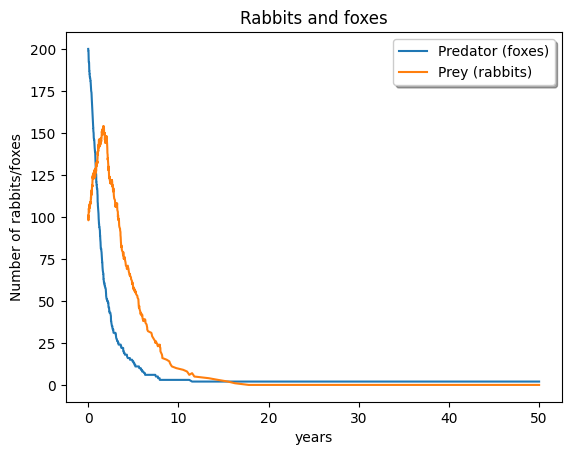

In [4]:
# Define the propensity function
def prop_PredPrey(Y, p):
    # Write you code here
    a = p[0]
    b = p[1]
    c = p[1]
    d = p[2]

    y_1 = Y[0]
    y_2 = Y[1]
    propensity_array = [b * y_1 * y_2, d * y_2, c * y_1]
    return propensity_array


# Define the stoichiometry matrix

# Write your code here
stoch_PredPrey = np.array([[-1, 1], [0, -1], [1, 0]])

# Time interval
t0 = 0  # Start time
t1 = 50  # Final time
tspan = (t0, t1)  # Time interval

# Initial values
prey0 = 200  # Initial number of prey (rabbits, y1)
pred0 = 100  # Initial number of predator (foxes, y2)
Y0 = np.array([prey0, pred0])  # Initial values, a list (y1(0) y2(0))

# Define parameters
a = 0.6
b = 0.005
c = 0.005
d = 0.4
param = (a, b, d)

t, Y = SSA(prop_PredPrey, stoch_PredPrey, Y0, tspan, param)
# Plot the solution
# Time stored in t, Predator in Y[0], Prey in Y[1]
plt.plot(t, Y[:, 0], label="Predator (foxes)")
plt.plot(t, Y[:, 1], label="Prey (rabbits)")
plt.title("Rabbits and foxes")
plt.xlabel("years")
plt.ylabel("Number of rabbits/foxes")
plt.legend(shadow=True)
plt.show()

<p>You can compare with the equivalent ODE-solution by running the code below (the exact same setting is used). The stochastic solution (SSA) differs every time you run it. What about the ODE-solution? Does it change every time you run it?

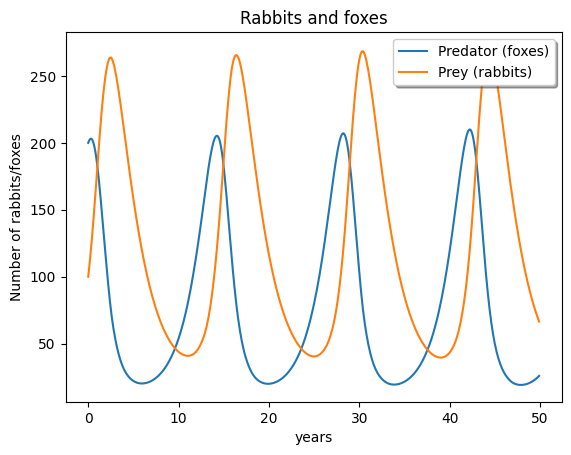

In [5]:
# Run to solve the ODE
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


# This function defines the right-hand-side in
# the ODE. Note that it is a system of two equations, and y will
# contain two variables, y_1(t) and y_2(t)
def ode_rhs(t, y, p):
    y1, y2 = y
    a, b, c, d = p
    yt = [a * y1 - b * y1 * y2, c * y1 * y2 - d * y2]
    return yt


t0 = 0  # Start time
t1 = 50  # Final time
tspan = (t0, t1)  # Time interval
prey0 = 200  # Initial number of prey (rabbits, y1)
pred0 = 100  # Initial number of predator (foxes, y2)
y0 = [prey0, pred0]  # Initial values, a list [y1(0) y2(0)]

# Define parameters
a = 0.6
b = 0.005
c = b
d = 0.4
p = (a, b, c, d)  # store the parameters in one list

times = np.arange(t0, t1, 0.1)  # This define at what times the solution is stored
predprey = solve_ivp(ode_rhs, tspan, y0, t_eval=times, args=(p,))

# Plot the solution
# Time stored in predprey.t, Predator in predprey.y[0], Prey in predprey.y[1]
plt.plot(predprey.t, predprey.y[0], label="Predator (foxes)")  # Predator in y[0]
plt.plot(predprey.t, predprey.y[1], label="Prey (rabbits)")  # Prey in y[1]
plt.title("Rabbits and foxes")
plt.xlabel("years")
plt.ylabel("Number of rabbits/foxes")
plt.legend(shadow=True)
plt.show()

<h4>Stochastic vs. deterministic models/methods</h4>
<p>What you have worked with here is the Predator-Prey model described both as a stochastic model (solved with SSA) and deterministic model (the ODE). It was solved with a stochastic numerical method (SSA) and a deterministic numerical method (in this case a Runge-Kutta method), respectively. A deterministic method always result in the same solution (given the same indata), and a stochastic method result in different solutions every simulation (give the same indata).
</p>